Transformation of Pandas Chapter into Jupyter Lab Notebook for better data visualization. Also will make it much easier for me to grasp each step, one-by-one! Pandas is a library which is useful for manipulating datasets, so this will be a useful introduction. And I'll learn more about using matplotlib

In [1]:
import pandas as pd
import numpy as np
#this inline code should make the graphs print within the jupyter notebook instead of in an external python program
%matplotlib inline
import matplotlib
#.use() defines the type of backend we will use. Don't worry too much about this for now. It turns out the line importing the backend was the thing screwing up my code.
import matplotlib.pyplot as plt

Pandas DataFrames

In [6]:
# Read iris dataset from UCI database
#names is a useful paramater if dataset isn't already labeled to label the columns.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [7]:
# Get info of the data
print(df)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
# Get statistical summary of the data
print(df.describe())
print('')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000



In [10]:
# Look at first 10 rows of the data
print(df.head(10))
print('')

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa



In [6]:
# Select rows with sepal_length more than 5.0
df2 = df.loc[df['sepal_length'] > 5.0, ]

Data Visualization in Pandas

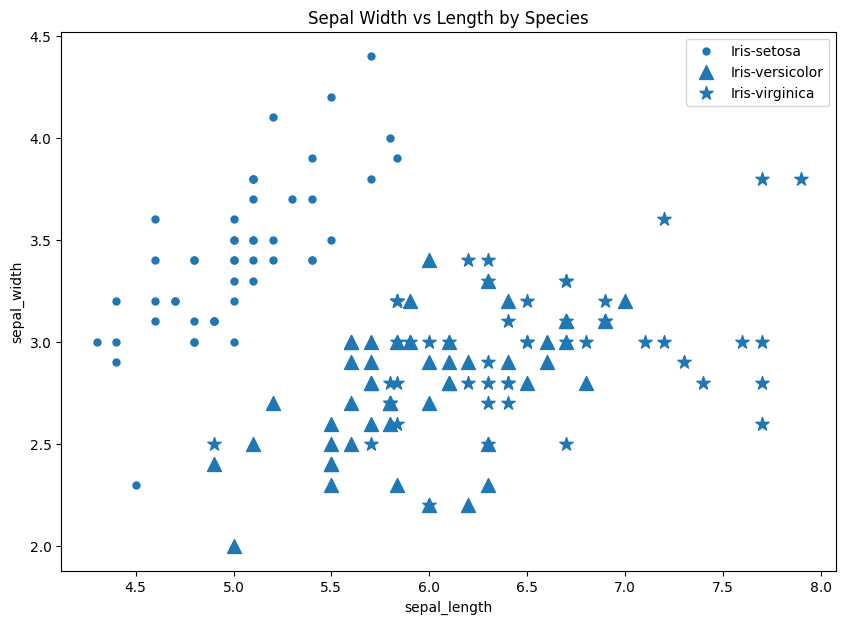

In [18]:
# Define marker shapes by class
marker_shapes = ['.', '^', '*']

# Then, plot the scatterplot
for i, species in enumerate(df['class'].unique()):
  if i == 0:
    ax = df[df['class'] == species].plot.scatter(x='sepal_length', y='sepal_width', marker=marker_shapes[i], s=100,title="Sepal Width vs Length by Species", label=species, figsize=(10,7))
  else:
    df[df['class'] == species].plot.scatter(x='sepal_length', y='sepal_width', marker=marker_shapes[i], s=100, title="Sepal Width vs Length by Species", label=species, ax=ax)
plt.show()

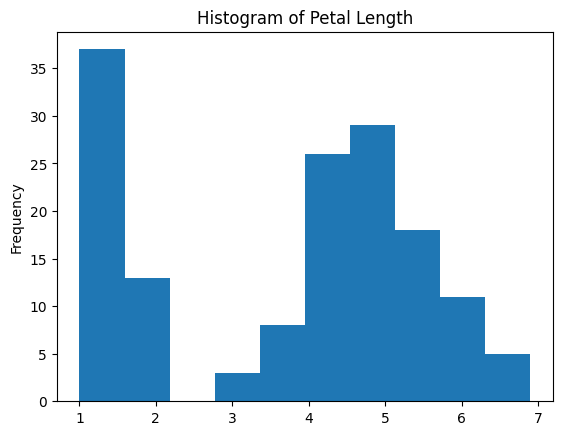

In [7]:
# Plot histogram
df['petal_length'].plot.hist(title='Histogram of Petal Length')
plt.show()

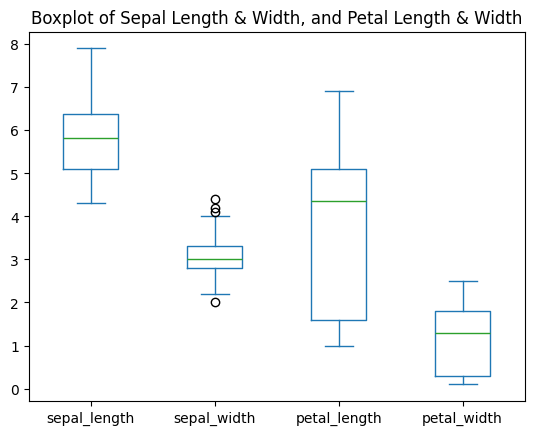

In [17]:
# Plot boxplot
df.plot.box(title='Boxplot of Sepal Length & Width, and Petal Length & Width')

Data Preprocessing in Pandas

In [13]:
# Encode categorical variables
df2 = pd.DataFrame({'Day': ['Monday','Tuesday','Wednesday',
                           'Thursday','Friday','Saturday',
                           'Sunday']})
                           
# One-hot-encode
print(pd.get_dummies(df2))
print('')

# Imputing missing values
# Import the iris data once again
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Randomly select 10 rows
random_index = np.random.choice(df.index, replace= False, size=10)

# Set the sepal_length values of these rows to be None
df.loc[random_index,'sepal_length'] = None


   Day_Friday  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0       False        True         False       False         False   
1       False       False         False       False         False   
2       False       False         False       False         False   
3       False       False         False       False          True   
4        True       False         False       False         False   
5       False       False          True       False         False   
6       False       False         False        True         False   

   Day_Tuesday  Day_Wednesday  
0        False          False  
1         True          False  
2        False           True  
3        False          False  
4        False          False  
5        False          False  
6        False          False  



In [14]:
# Check where the missing values are
print(df.isnull().any())
print('')

sepal_length     True
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool



In [15]:
# Drop missing values
print("Number of rows before deleting: %d" % (df.shape[0]))
df2 = df.dropna()
print("Number of rows after deleting: %d" % (df2.shape[0]))
print('')

Number of rows before deleting: 150
Number of rows after deleting: 140



In [16]:
# Replace missing values with the mean
df.sepal_length = df.sepal_length.fillna(df.sepal_length.mean())

# Confirm that there are no missing values left
print(df.isnull().any())
print('')

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

